find the best individual
Kl1o !0dyxOx*$Oia


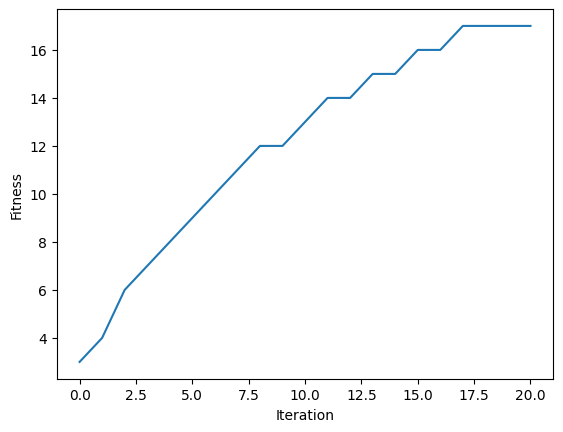

In [1]:
#改进一下，把交叉和变异都放到选择函数里面去

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy


def get_fitness(guess,target):
    return sum(1 for expected, actual in zip(target, guess)
               if expected == actual)


#定义初始化种群函数
def init_population(pop_size,chromosome_length):
    population = [[] for _ in range(pop_size)]
    for i in range(pop_size):
        population[i] = ''.join(np.random.choice(list(geneset),size=chromosome_length))
    return population

#定义计算适应度函数
def fitness_(population):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = get_fitness(population[i],target)
    return fitness

#定义选择函数，我保留了前10%的个体，然后复制到后面
def select(population,fitness,pc,pm,sp):
    population_new = []
    #获取前10%的个体
    for i in range(int(len(population)*sp)):
        index = np.argmax(fitness)
        population_new.append(population[index])
        fitness[index] = -999

    population_head = copy.deepcopy(population_new)
    #获取剩下的90%的个体,剩下的90% 是复制前10%的个体
    for i in range(len(population)-int(len(population)*sp)):
        rand = random.random()
        if rand < pc: #交叉
            index1 = random.randint(0,len(population_head)-1)
            index2 = random.randint(0,len(population_head)-1)
            cross_point = random.randint(0,len(population_head[0])-1)
            population_new.append(population_head[index1][0:cross_point]+population_head[index2][cross_point:])
        if rand < pm: #变异
            index = random.randint(0,len(population_head[0])-1)
            population_new.append(population_head[i % int(len(population)*sp)][0:index]+np.random.choice(list(geneset),size=1)[0]+population_head[i % int(len(population)*sp)][index+1:])
        if rand >= max(pc,pm):
            population_new.append(population_new[i % int(len(population)*sp)])
    return population_new



#定义终止条件函数
def is_stop(population,fitness,iteration):
    if iteration == 1000:
        return True
    elif max(fitness) == len(target):
        print('find the best individual')
        print(population[np.argmax(fitness)])
        return True
    else:
        return False
    
#定义遗传算法函数
def genetic(pop_size,chromosome_length,pc,pm,sp):
    population = init_population(pop_size,chromosome_length)
    fitness_history = []
    iteration = 0
    fitness = fitness_(population)
    while True:
        iteration += 1
        fitness = fitness_(population)
        fitness_history.append(max(fitness))
        population = select(population,fitness,pc,pm,sp)
        if is_stop(population,fitness,iteration):
            break
    return fitness_history

#定义画图函数
def plot(fitness_history):
    plt.plot(fitness_history)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.show()

#主函数
if __name__ == '__main__':
    target = 'Kl1o !0dyx6x*$Oia'
    geneset = ' abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!.@#$%^&*()_+-=<>?/;:[]|'

    #定义种群规模
    pop_size = 500
    #定义染色体长度
    chromosome_length = len(target)
    #定义交叉概率
    pc = 0.8
    #定义变异概率
    pm = 0.2
    #定义保留率
    sp = 0.1


    fitness_history = genetic(pop_size,chromosome_length,pc,pm,sp)
    plot(fitness_history)




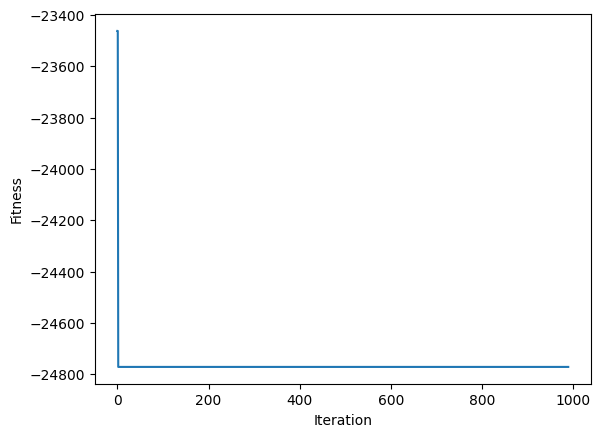

最优解： [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
最优解对应的x1,x2: 0.0 15.0
最优解对应的函数值： -24771.093749999996


In [45]:
#这个应该是求最小值

import numpy as np
import matplotlib.pyplot as plt
import math
import random

#定义目标函数
def func(x1,x2):
    #找一个特别复杂的函数，看看遗传算法能不能找到最优解
    # return 100 * (x1**2 - x2)**2 + (1 - x1)**2
    # return 0.5 - (math.sin(math.sqrt(x1**2+x2**2))**2-0.5)/(1+0.001*(x1**2+x2**2))**2  #这个函数有问题，文章中是0，0点对应1的值,但是我求出来在1，1点有更小的值
    # return (x1**2+x2**2)**0.25*(math.sin(50*(x1**2+x2**2)**0.1)**2+1)
    return 10**5*x1**2+x2**2-(x1**2+x2**2)**2+10**(-5)*(x1**2+x2**2)**4

def binary2decimal(binary):
    x1 = 0
    for i in range(len(binary)//2):
        x1 += binary[i]*math.pow(2,i)

    x2 = 0
    for i in range(len(binary)//2,len(binary)):
        x2 += binary[i]*math.pow(2,i-len(binary)//2)
    return x1,x2

#定义初始化种群函数
def init_population(pop_size,chromosome_length):
    population = np.zeros((pop_size,chromosome_length))
    for i in range(pop_size):
        for j in range(chromosome_length):
            population[i][j] = random.randint(0,1)
    return population

#定义计算适应度函数
def fitness_(population):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        x1,x2 = binary2decimal(population[i])
        fitness[i] = func(x1,x2)
    return fitness

#定义选择函数
def select(population,fitness,sp):
    population_new = []
    #获取前10%的个体
    for i in range(int(len(population)*sp)):
        index = np.argmin(fitness)
        population_new.append(population[index])
        fitness[index] = float('inf')
    #获取剩下的90%的个体,剩下的90% 是复制前10%的个体
    for i in range(len(population)-int(len(population)*sp)):
        population_new.append(population_new[i])
    return population_new

#定义交叉函数
def crossover(population,pc):
    population_new = np.zeros((len(population),len(population[0])))
    population_new[0] = population[0] #保留最优个体
    for i in range(1,len(population)):
        rand = random.random()
        if rand < pc:
            index1 = random.randint(0,len(population)-1)
            index2 = random.randint(0,len(population)-1)
            cross_point = random.randint(0,len(population[0])-1)
            population_new[i] = np.hstack((population[index1][0:cross_point],population[index2][cross_point:])) #np.hstack()是水平拼接
        else:
            population_new[i] = population[i]
    return population_new

#定义变异函数
def mutation(population,pm):
    population_new = np.zeros((len(population),len(population[0])))
    population_new[0] = population[0] #保留最优个体
    for i in range(1,len(population)):
        rand = random.random()
        if rand < pm:
            index = random.randint(0,len(population[0])-1)
            if population[i][index] == 0:
                population_new[i] = np.hstack((population[i][0:index],1,population[i][index+1:]))
            else:
                population_new[i] = np.hstack((population[i][0:index],0,population[i][index+1:]))
        else:
            population_new[i] = population[i]
    return population_new

#定义终止条件函数
def is_stop(population,fitness,iteration):
    if iteration == 1000:
        return True
    else:
        return False
    
#定义遗传算法函数
def genetic(pop_size,chromosome_length,pc,pm,sp):
    population = init_population(pop_size,chromosome_length)
    fitness_history = []
    best_history = []
    iteration = 0
    fitness = fitness_(population)
    while True:
        iteration += 1
        fitness = fitness_(population)
        fitness_history.append(min(fitness))
        best_history.append(population[np.argmin(fitness)])
        population = select(population,fitness,sp)
        population = crossover(population,pc)
        population = mutation(population,pm)
        if is_stop(population,fitness,iteration):
            break
    return fitness_history,best_history

#定义画图函数
def plot(fitness_history):
    plt.plot(fitness_history)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.show()

#主函数
if __name__ == '__main__':
    pop_size = 100
    chromosome_length = 17
    pc = 0.8
    pm = 0.9
    sp = 0.5
    fitness_history,best = genetic(pop_size,chromosome_length,pc,pm,sp)
    plot(fitness_history[10:]) #画图时去掉前10个点，因为前10个点的值太大，会影响后面的点的显示
    print('最优解：',best[-1])
    x1,x2 = binary2decimal(best[-1])
    print('最优解对应的x1,x2:',x1,x2)
    print('最优解对应的函数值：',func(x1,x2))